The purpose of this notebook is to 

* establish a two-level reference system for analysing city demographics
* provide a stylized infrastructure for use in generating synthetic data
* enable graphical display of a city and its parts
* provide a reference architecture for further expansion in notebooks or libraries

# Imports

In [135]:
import numpy as np
from random import randrange, random
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

# Constants

In [136]:
GRD = 10  # what are the dimensions of the symmetrical grid containing the buurten
          # there will be GRD*GRD buurten as a result
RES = 10  # what is the resolution in pixels of each grid cell
NUM = 10  # how many higher level entities, wijken

# Functional Requirements

## Requirements

The requirements for the lower-level detail of the city is that: 
* The low-level parts of the city are called and represent buurten.
* The buurten should be represented as a 2D array.
* Each grid cell should be indexed by its grid centroid. 
* The low-level grid should store one thing -- a single type representing its residents.
* The full grid should be able to be drawn using polygons.

The requirements for the higher-level of the city is that
* The high-level parts of the city are called and represent wijken.
* The wijken should be represented as polygons of variable sizes.
* The wijken of the city should be stored, and be iterable in a list.
* There should be a separation of concerns between the wijken and their graphic representation.
* Each wijk should be able to be drawn using polygons.

The joint requirements for the low and the high level of the city is that
* The buurten and the wijken should be made easily extensible so that they may be used for more realistic cases.
* Each wijk should have a list of all the buurten it contains.

## Functions

In [143]:
# this creates the grid/buurten
def create_grid():
    x = np.arange(0, GRD, 1)
    y = np.arange(0, GRD, 1)
    alist = [[(i+.5,j+.5) for j in y] for i in x]
    arr=np.array(alist,'f,f')
    
    return arr
        
# these create the high-level regions, the wijken
def create_regions():
    points = []
    for  i in range(NUM):
        x = random()*GRD
        y = random()*GRD
        coord = [x,y]
        points.append(coord)
    pt_array = np.array(points)
    vor = Voronoi(points,furthest_site = False)
    return pt_array, vor

# this displays the regions
def display_polygons(points,vor):
    boundary = np.array([[0, 0], [0, 10], [10, 10], [10,0]])

    x, y = boundary.T
    plt.xlim(round(x.min() - 1), round(x.max() + 1))
    plt.ylim(round(y.min() - 1), round(y.max() + 1))
    #plt.plot(points,'b.')
    #print(points.shape)
    plt.plot(*points.T, 'b.')

    diameter = np.linalg.norm(boundary.ptp(axis=0))
    boundary_polygon = Polygon(boundary)
    poly_list = []
    
    for p in voronoi_polygons(Voronoi(points), diameter):
        a  = p.intersection(boundary_polygon).exterior.coords
        x, y = zip(*a)
    
        poly = Polygon(a)
        poly_list.append(poly)
        plt.plot(x, y, 'r-')

    plt.show()
    return poly_list

# pass the grid array to this
# needs to be stored at the wijk-level
def assign_grid2poly(arr,poly_list):
    for n,k in enumerate(poly_list):
        for i in range(GRD):
            for j in range(GRD):
                p = Point(arr[i,j])
 
                if (k.contains(p)):
                    print(n,i,j)
             

# Example Use

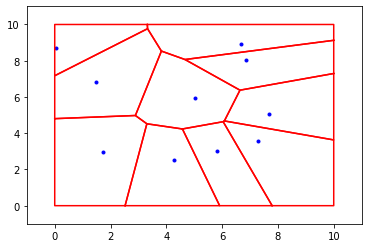

0 3 9
0 4 8
0 4 9
0 5 8
0 5 9
0 6 8
0 6 9
0 7 9
0 8 9
0 9 9
1 3 4
1 3 5
1 3 6
1 4 4
1 4 5
1 4 6
1 4 7
1 5 4
1 5 5
1 5 6
2 0 5
2 0 6
2 0 7
2 1 5
2 1 6
2 1 7
2 2 5
2 2 6
2 2 7
2 2 8
2 3 7
2 3 8
3 5 7
3 6 6
3 6 7
3 7 7
3 7 8
3 8 7
3 8 8
3 9 7
3 9 8
4 5 1
4 5 2
4 5 3
4 6 0
4 6 1
4 6 2
4 7 0
5 3 0
5 3 1
5 3 2
5 3 3
5 4 0
5 4 1
5 4 2
5 4 3
5 5 0
6 6 3
6 6 4
6 7 1
6 7 2
6 7 3
6 8 0
6 8 1
6 8 2
6 8 3
6 9 0
6 9 1
6 9 2
6 9 3
7 0 0
7 0 1
7 0 2
7 0 3
7 0 4
7 1 0
7 1 1
7 1 2
7 1 3
7 1 4
7 2 0
7 2 1
7 2 2
7 2 3
7 2 4
8 0 8
8 0 9
8 1 8
8 1 9
8 2 9
9 6 5
9 7 4
9 7 5
9 7 6
9 8 4
9 8 5
9 8 6
9 9 4
9 9 5
9 9 6


In [145]:
# create the buurten
arr=create_grid()

# create the data for the wijken
points, vor = create_regions()

# display the wijken using polygons
poly_list = display_polygons(points,vor)

# enumerate the buurten and declare their respective wijken
assign_grid2poly(arr,poly_list)